In [9]:
import numpy as np

In [ ]:
"""crea un archivo txt con una matriz 100x100 dejar datos vacios con la palabra 'Faltante'"""
"Reemplaza los valores NaN con la palabra 'Faltante' al guardar el archivo."
def crea_matriz_100x100():
    file100x100 = np.random.rand(100, 100)  # matriz 100x100 de números aleatorios
    file100x100[file100x100 < 0.2] = np.nan  # introducir NaNs
    np.savetxt("../../data/ejercicios/100x100.txt", file100x100, fmt="%.2f", 
               delimiter=" ", header="Archivo 100x100", comments="")

crea_matriz_100x100()

ValueError: could not convert string to float: 'Faltante'

In [48]:
file100x100 = "../../data/ejercicios/100x100.txt"
M = np.genfromtxt(file100x100, delimiter=None, dtype=float, missing_values=["Faltante"],  filling_values=999)
M


array([[2.30e-01, 7.70e-01, 7.90e-01, ..., 4.40e-01, 7.90e-01, 9.20e-01],
       [2.60e-01, 9.30e-01, 5.20e-01, ..., 9.99e+02, 3.90e-01, 8.00e-01],
       [8.10e-01, 9.99e+02, 8.90e-01, ..., 3.60e-01, 9.99e+02, 3.00e-01],
       ...,
       [6.60e-01, 9.99e+02, 3.00e-01, ..., 8.20e-01, 9.99e+02, 9.60e-01],
       [9.99e+02, 8.10e-01, 3.70e-01, ..., 5.90e-01, 3.30e-01, 3.20e-01],
       [9.99e+02, 9.99e+02, 4.00e-01, ..., 4.20e-01, 4.70e-01, 5.50e-01]],
      shape=(100, 100))

In [54]:
def transforma_m100x100(f):
    """
    Lee una matriz 100x100 desde 'f', reemplaza 'Faltante' por 999 y genera:
      - vector aplanado (10,000 elems)
      - subconjunto cada_cien (vector[::100], 100 elems)
      - arreglo enes_999 (solo los 999 encontrados)
    Retorna en orden: (matriz_100x100, aplanado, cada_cien, enes_999)
    """

    M = np.genfromtxt(f, delimiter=None, dtype=float, missing_values=["Faltante"],  filling_values=999)

    if M.shape != (100, 100):
        raise ValueError(f"Forma inesperada: {M.shape}. Se esperaba (100, 100).")

    aplanado = M.ravel(order="C")

    cada_cien = aplanado[::100]
    enes_999 = M[M == 999]

    return M, aplanado, cada_cien, enes_999


In [ ]:
M, aplanado, cada_cien, enes_999 = transforma_m100x100(file100x100)

print("| Comprobación       | Condición esperada")
print("| Dimensión matriz:      |", M.shape, "\n| Dimensión vector:     |", aplanado.shape, "\n| Dimensión subconjunto:   |", cada_cien.shape, "\n| Contenido de enes_999: |", enes_999.size)

"Organizar estos datos en una tabla"





| Comprobación       | Condición esperada
| Dimensión matriz:      | (100, 100) 
| Dimensión vector:     | (10000,) 
| Dimensión subconjunto:   | (100,) 
| Contenido de enes_999: | 2023


In [66]:
"""
    Realiza cuatro operaciones entre matrices A y B:
      1) Suma (A + B)
      2) Resta (A - B)
      3) Multiplicación elemento a elemento (A * B)
      4) Producto matricial (A @ B)

    Retorna: (suma, resta, mult_elemento, prod_matricial)

    Requisitos:
      - Para (1)(2)(3): A y B deben tener la MISMA forma.
      - Para (4): A.shape = (n, m), B.shape = (m, p) para que A @ B sea válido.
    """

n, m = 5, 5
A = np.random.rand(n, m)
B = np.random.rand(n, m)

def operaciones_matrices(A, B):
    # Validación de tipo
    if not isinstance(A, np.ndarray) or not isinstance(B, np.ndarray):
        raise TypeError("A y B deben ser arreglos de tipo numpy.ndarray.")
    
    if A.shape != B.shape:
        raise ValueError("A y B deben tener la misma forma.")

    # Cálculos básicos
    suma = A + B
    resta = A - B
    mult_elemento = A * B

    if A.shape[1] != B.shape[0]:
        raise ValueError(
            f"Las dimensiones internas deben coincidir para el producto punto: "
            f"A.shape={A.shape}, B.shape={B.shape}"
        )

    prod_matricial = A @ B
    
    return suma, resta, mult_elemento, prod_matricial

suma, resta, mult_elemento, prod_matricial = operaciones_matrices(A, B)

print("Operaciones básicas:")
print("\nsuma:", suma)
print("\nresta:", resta)
print("\nproducto_elemento:", mult_elemento)
print("\nproducto_punto:", prod_matricial)

Operaciones básicas:

suma: [[0.89863611 1.58053465 0.99277747 0.88471814 1.16214355]
 [1.41243934 0.51388853 1.37733212 1.84494744 1.02905653]
 [1.62865123 1.11109049 0.99037122 1.34631147 1.03130766]
 [1.06340485 0.68495158 1.63928361 0.19606744 1.31942002]
 [0.32474147 0.56321698 0.58229991 1.41917703 0.8820983 ]]

resta: [[ 0.59047788  0.20004916  0.9614679  -0.80954333  0.21182978]
 [ 0.08585147  0.16873377 -0.08195553 -0.14747936  0.8974322 ]
 [-0.07521094  0.73240086  0.47131996  0.19572997  0.44453347]
 [-0.36714831 -0.04069533 -0.0308244  -0.13437378 -0.47566964]
 [ 0.21851258  0.11835832 -0.40467161  0.26261815 -0.83392318]]

producto_elemento: [[0.11472068 0.61451753 0.01529665 0.03184145 0.32642645]
 [0.4969036  0.05890259 0.47258176 0.84552023 0.0633932 ]
 [0.66171204 0.17452776 0.18967316 0.44356109 0.21649637]
 [0.249008   0.11687564 0.67157516 0.00509653 0.3786519 ]
 [0.01442732 0.07580117 0.04382852 0.48627379 0.02066738]]

producto_punto: [[1.6010614  1.019026   1.285

In [69]:
from PIL import Image
import matplotlib.pyplot as plt

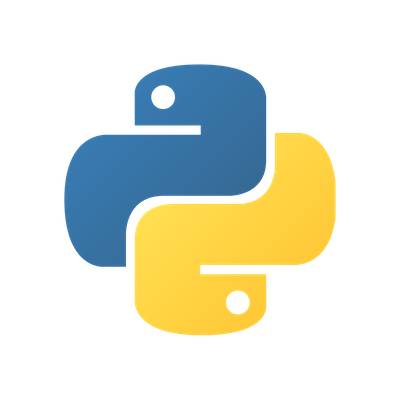

In [78]:
f = "../../data/python.png"
img = Image.open(f)
img_array = np.array(img)
img

In [79]:
def analizar_imagen_y_graficar_canales(ruta_imagen):
    #Cargar la imagen y convertir a RGBA
    image = Image.open(ruta_imagen).convert("RGBA")
    #Convertir a un arreglo
    arr = np.array(image)
    
    #Dimensiones (ancho = nx, alto, ny)
    ny, nx, channels = arr.shape
    if channels != 4:
        raise ValueError(f"Se esperaba RGBA (4 canales) y se obtuvo {channels} canales.")
    
    #Contar píxeles no transparentes (alpha == 255)
    alpha = arr[:, :, 3]
    pixeles_no_transparentes = int(np.sum(alpha == 255))
    
    #Visualizar canales en subplots
    R = arr[:, :, 0]
    G = arr[:, :, 1]
    B = arr[:, :, 2]
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    axs = axs.ravel()

    axs[0].imshow(R, cmap="Reds", vmin=0, vmax=255)
    axs[0].set_title("Canal Rojo (R)")
    axs[0].axis("off")

    axs[1].imshow(G, cmap="Greens", vmin=0, vmax=255)
    axs[1].set_title("Canal Verde (G)")
    axs[1].axis("off")

    axs[2].imshow(B, cmap="Blues", vmin=0, vmax=255)
    axs[2].set_title("Canal Azul (B)")
    axs[2].axis("off")

    axs[3].imshow(alpha, cmap="gray", vmin=0, vmax=255)
    axs[3].set_title("Canal Alpha (A)")
    axs[3].axis("off")

    fig.suptitle("Descomposición por canales — logo.png", y=0.98)
    plt.tight_layout()
    plt.show()

    return nx, ny, pixeles_no_transparentes

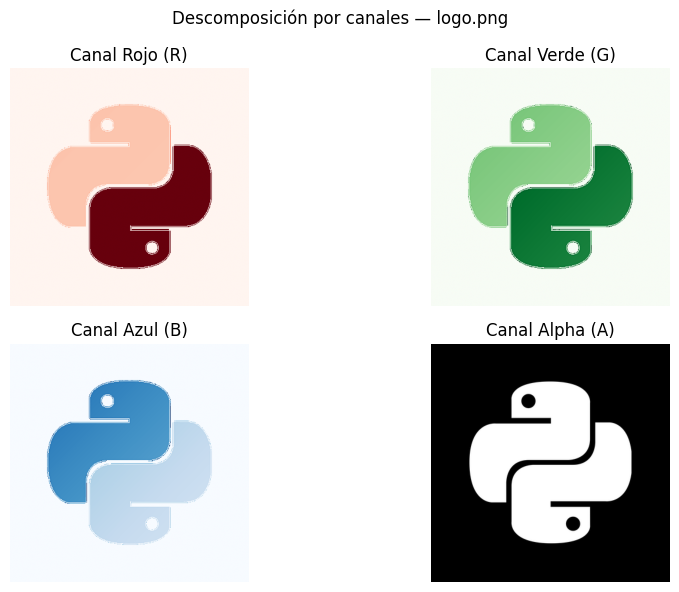

In [80]:
nx, ny, pixeles_no_transparantes = analizar_imagen_y_graficar_canales(f)

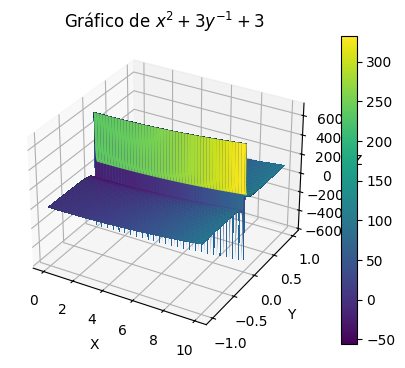

In [81]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_funcion():
    # Crear los vectores base
    x = np.linspace(0, 10, 100)     # de 0 a 10, con100 puntos en el eje X
    y = np.linspace(-1, 1, 200)     # de -1 a 1, con 200 puntos en el eje Y
    
    # 2. Crear la malla (Y filas × X columnas)
    X, Y = np.meshgrid(x, y)        # Forma resultante: (200, 100)
    
    #Calcular Z según la función 𝑍=𝑋2+3𝑌−1+3
    Z = X**2 + 3*(1/Y) + 3
    
    return X, Y, Z

X, Y, Z = graficar_funcion()

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, antialiased=False)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Gráfico de $x^2 + 3y^{-1} + 3$")
plt.colorbar(ax.plot_surface(X, Y, Z, cmap="viridis"))
plt.show()